In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt



In [2]:
data=pd.read_csv("Bank_Personal_Loan_Modelling.csv")
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [4]:
data.dtypes
data

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [5]:
data=data.drop(labels='ID',axis=1)

#d2=d1[d1['Personal Loan']==1]
data


,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [6]:
data=data.drop(labels='ZIP Code',axis=1)
data

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,0,1,0
4996,30,4,15,4,0.4,1,85,0,0,0,1,0
4997,63,39,24,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,3,0.5,2,0,0,0,0,1,0


In [7]:
contcol=[i for i in data.columns if data[i].nunique()>5]
contcol



['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']

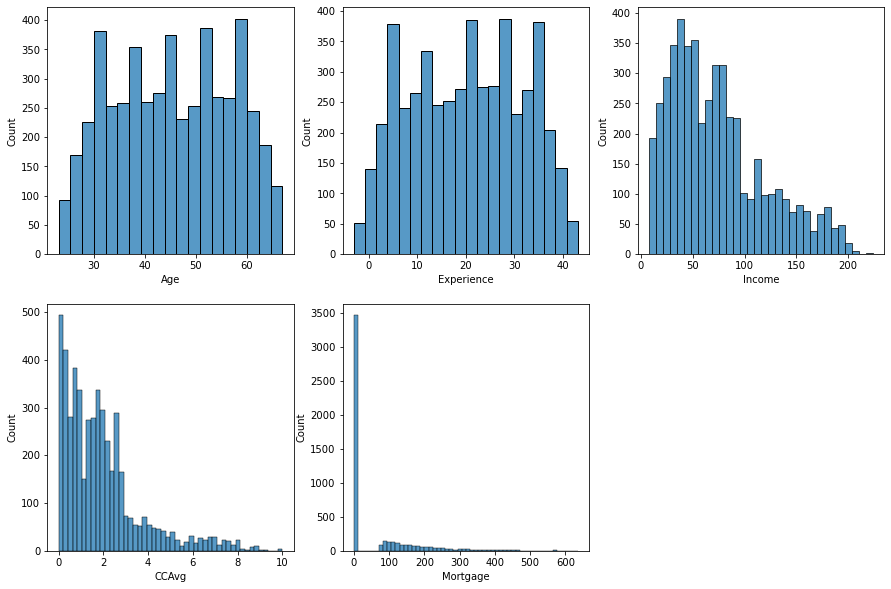

In [8]:
fig=plt.figure(figsize=(15,10))
for i,col in enumerate(contcol):
    ax=fig.add_subplot(2,3,i+1)
    sns.histplot(data[col])

In [9]:
catcol=[]
for i in data.columns:
    if i not in contcol:
        catcol.append(i)
        
catcol

['Family',
 'Education',
 'Personal Loan',
 'Securities Account',
 'CD Account',
 'Online',
 'CreditCard']

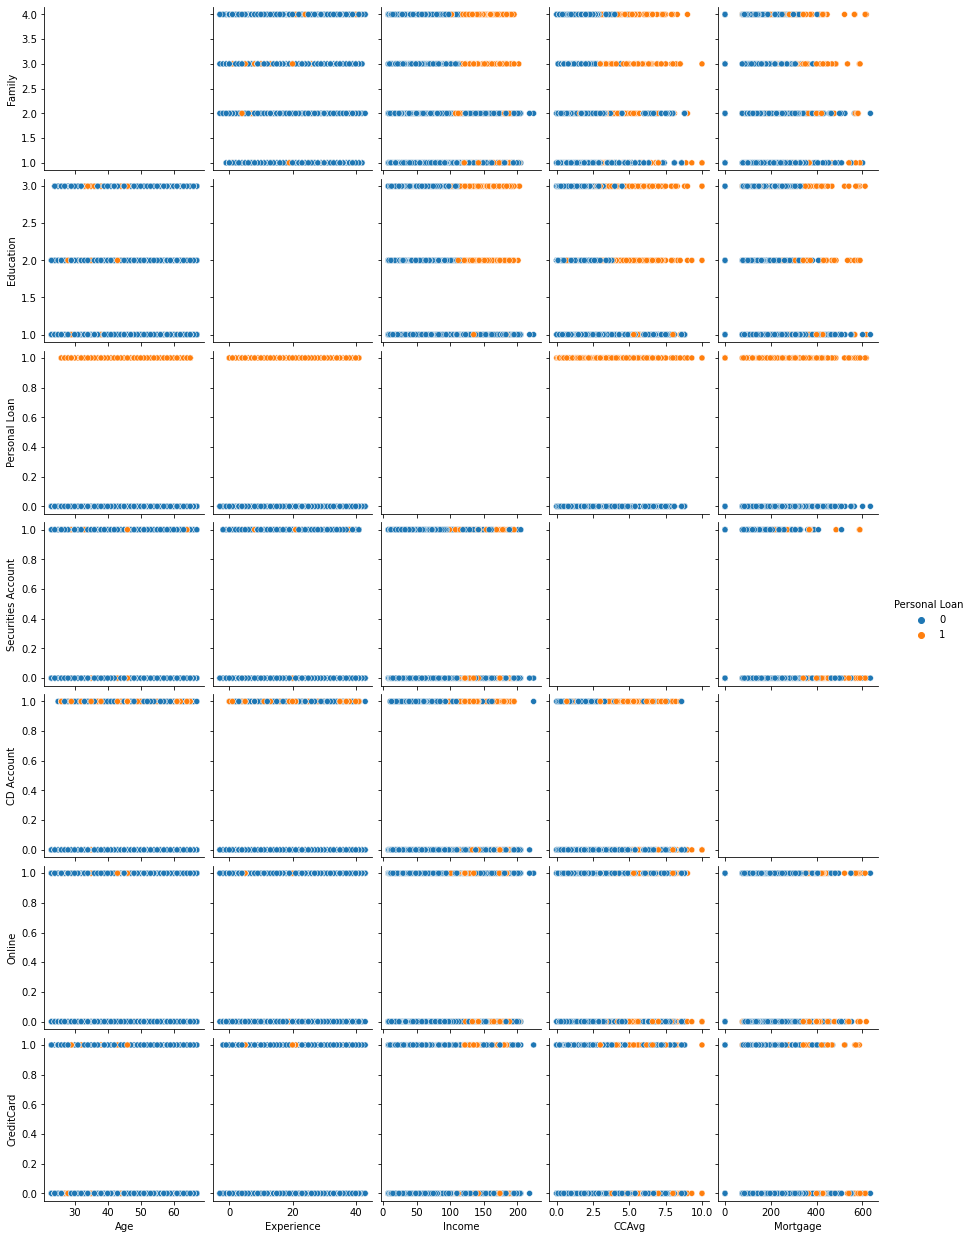

In [10]:
sns.pairplot(x_vars=contcol,y_vars=catcol,data=data,hue='Personal Loan')

<Figure size 360x720 with 0 Axes>

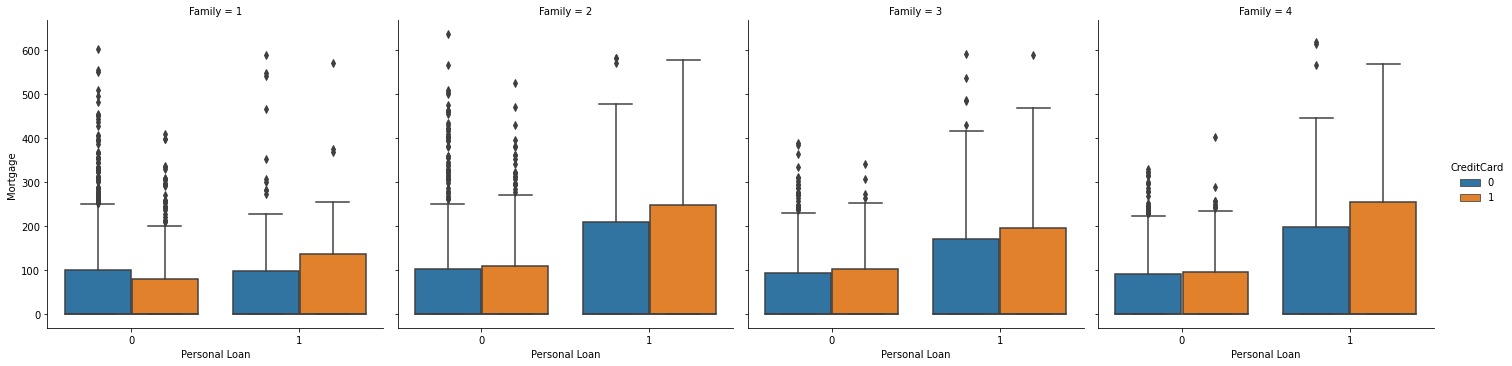

In [11]:
plt.figure(figsize=(5,10))
sns.catplot(y='Mortgage',x='Personal Loan',hue='CreditCard',col='Family',data=data,kind='box')

In [12]:
data['Account']=data['CD Account']+data['Securities Account']

In [13]:
data[['CD Account','Securities Account','Account','Personal Loan']].corr()

,CD Account,Securities Account,Account,Personal Loan
CD Account,1.000000,0.317034,0.756219,0.316355
Securities Account,0.317034,1.000000,0.860312,0.021954
Account,0.756219,0.860312,1.000000,0.185185
Personal Loan,0.316355,0.021954,0.185185,1.000000


In [14]:
data.drop('Account',axis=1,inplace=True)#weaker correlation;hence the column is dropped

<Figure size 360x720 with 0 Axes>

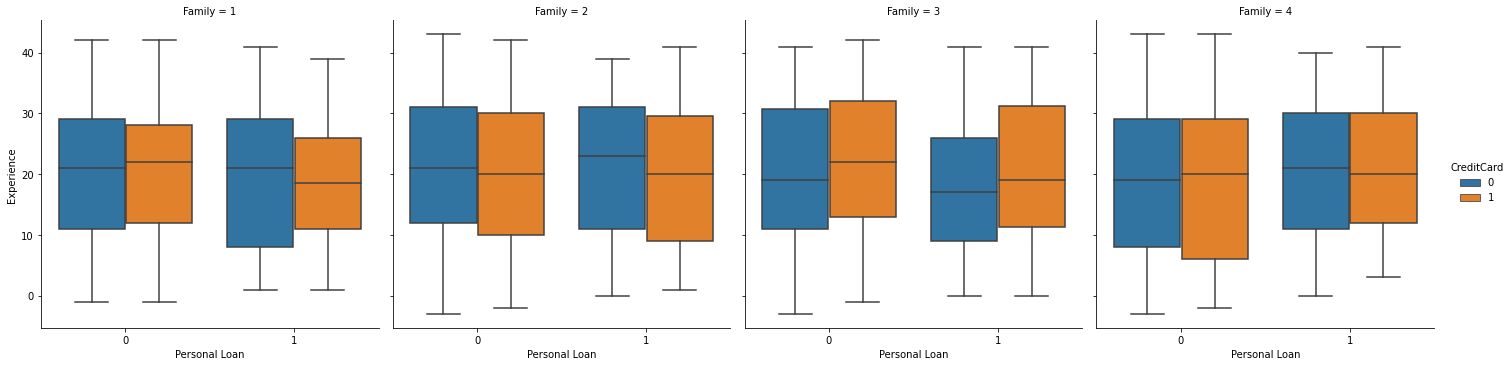

In [15]:
plt.figure(figsize=(5,10))
sns.catplot(y='Experience',x='Personal Loan',hue='CreditCard',col='Family',data=data,kind='box')


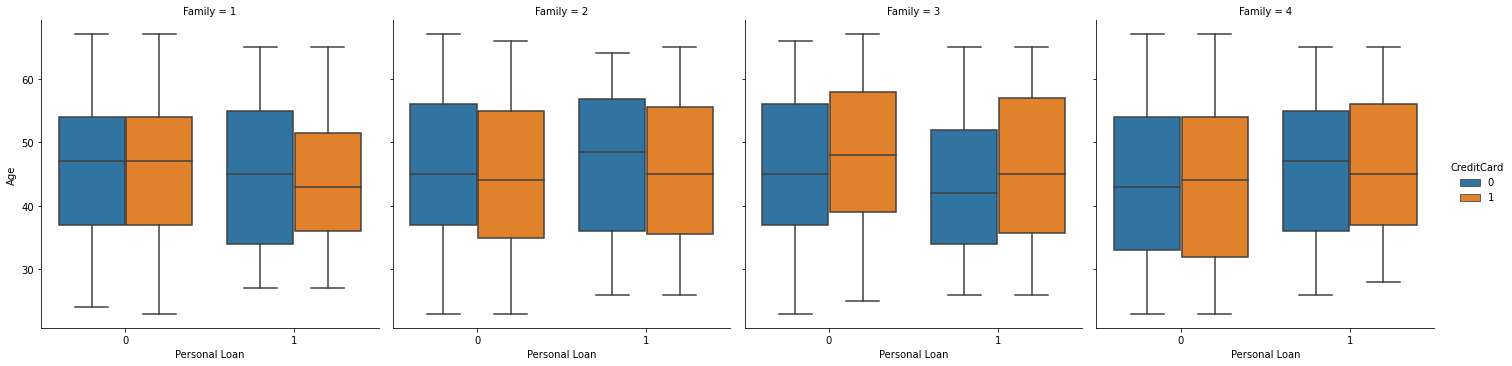

In [16]:
sns.catplot(y='Age',x='Personal Loan',hue='CreditCard',col='Family',data=data,kind='box')

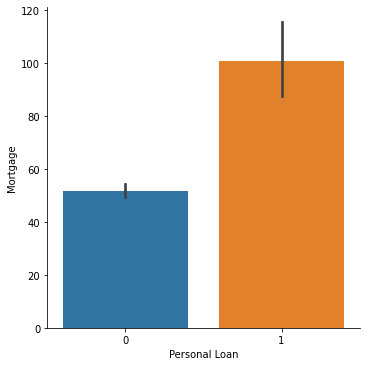

In [17]:

sns.catplot(x='Personal Loan',y='Mortgage',data=data,kind='bar')



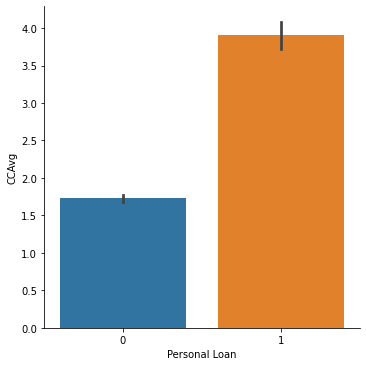

In [18]:

sns.catplot(x='Personal Loan',y='CCAvg',data=data,kind='bar')


In [19]:
data['Facilities']=data['Online']+data['CreditCard']
data

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Facilities
0,25,1,49,4,1.6,1,0,0,1,0,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,0,1,0,1
4996,30,4,15,4,0.4,1,85,0,0,0,1,0,1
4997,63,39,24,2,0.3,3,0,0,0,0,0,0,0
4998,65,40,49,3,0.5,2,0,0,0,0,1,0,1


In [20]:
data[['Facilities','Online','CreditCard','Personal Loan']].corr()#similar correlation;the two columns dropped

,Facilities,Online,CreditCard,Personal Loan
Facilities,1.000000,0.734052,0.682178,0.006493
Online,0.734052,1.000000,0.004210,0.006278
CreditCard,0.682178,0.004210,1.000000,0.002802
Personal Loan,0.006493,0.006278,0.002802,1.000000


In [21]:
data.drop(['Online','CreditCard'],axis=1,inplace=True)

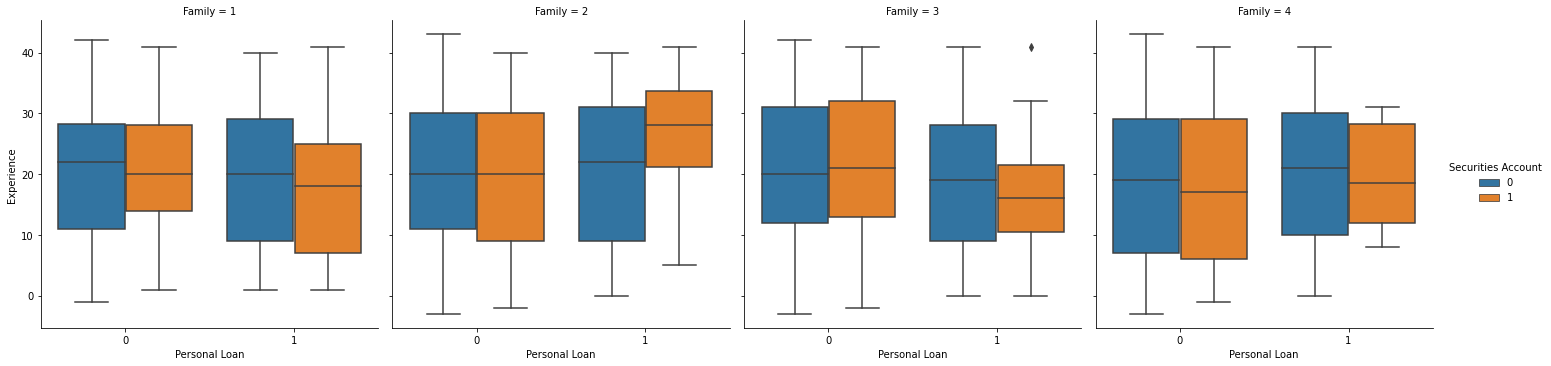

In [22]:
sns.catplot(y='Experience',x='Personal Loan',hue='Securities Account',col='Family',data=data,kind='box')

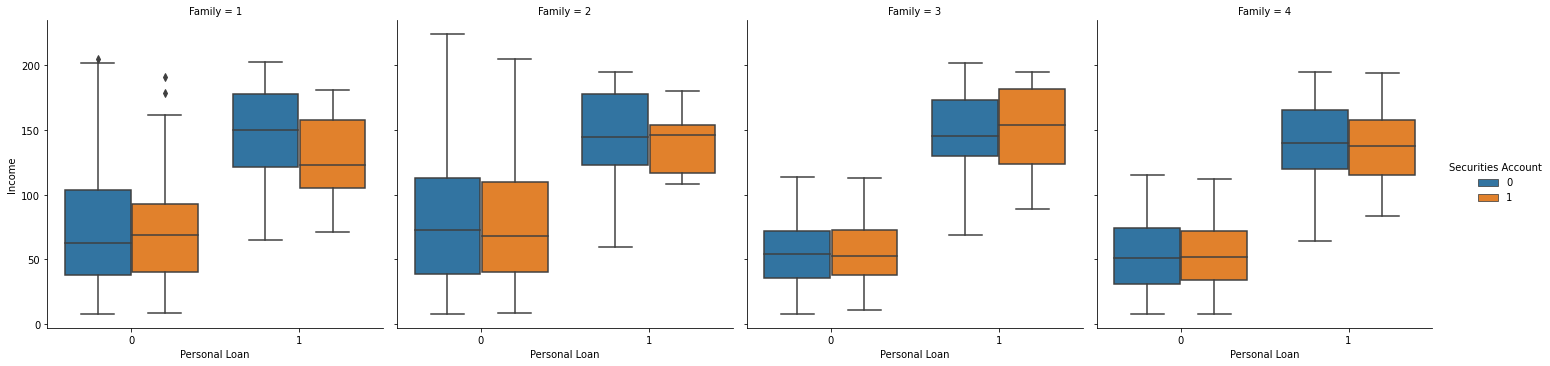

In [23]:
sns.catplot(y='Income',x='Personal Loan',hue='Securities Account',col='Family',data=data,kind='box')

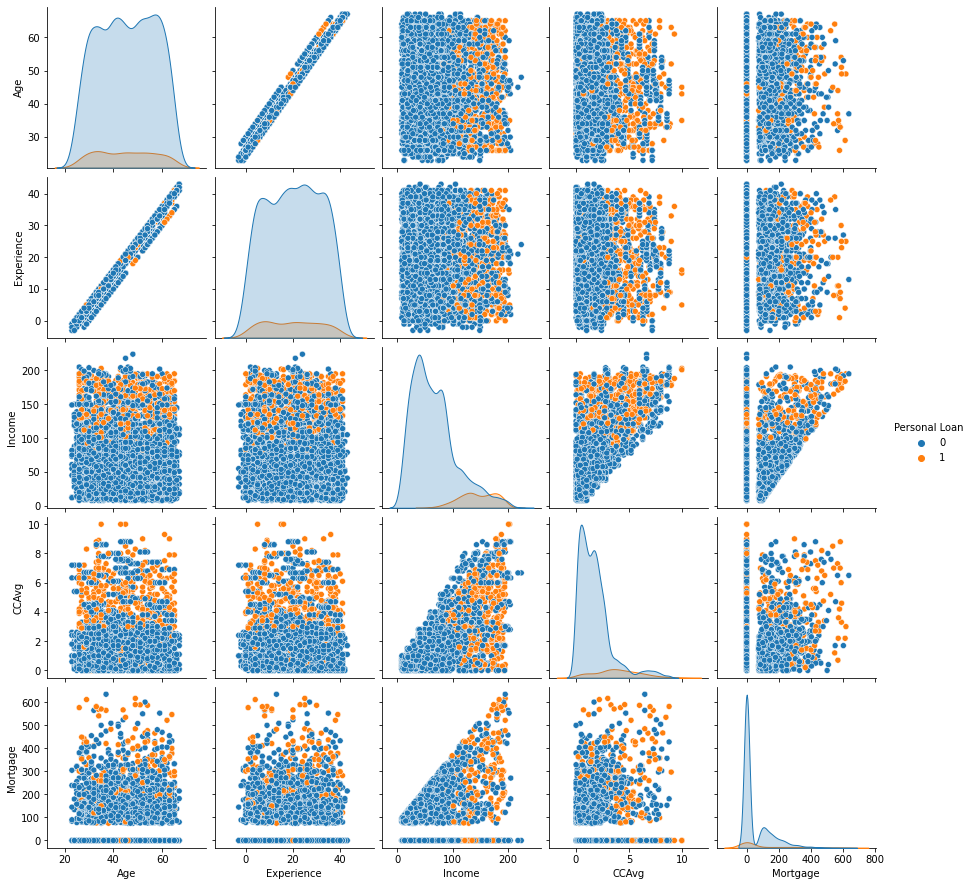

In [24]:
sns.pairplot(x_vars=contcol,y_vars=contcol,data=data,hue='Personal Loan')

<AxesSubplot:>

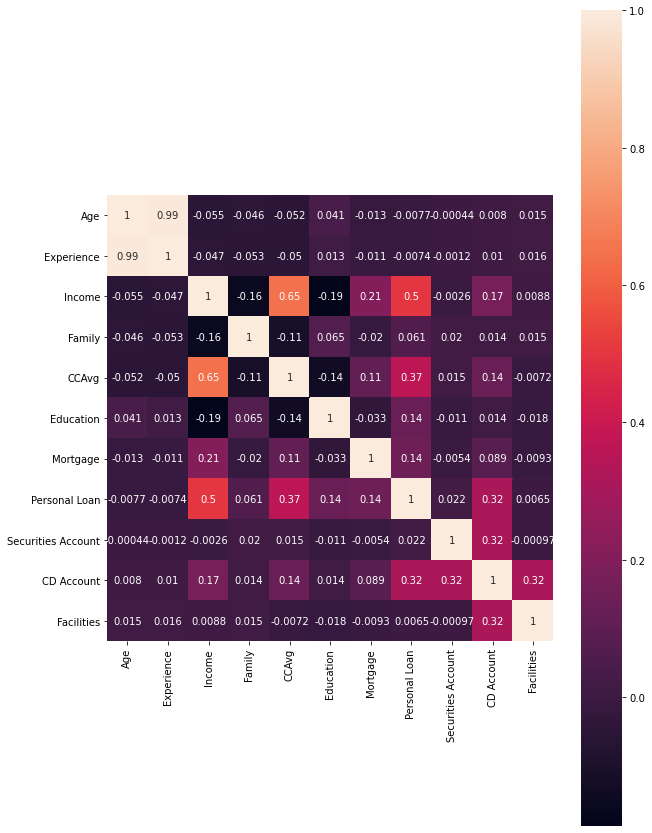

In [25]:
corvar=data.corr()
plt.figure(figsize=(10,15))
sns.heatmap(corvar,annot=True,square=True)


In [26]:
#model fitting without eliminating outliers


In [27]:
#from sklearn.preprocessing import StandardScaler
#scalar=StandardScaler()
#scaled_data=
data

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Facilities
0,25,1,49,4,1.6,1,0,0,1,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,0,1
4996,30,4,15,4,0.4,1,85,0,0,0,1
4997,63,39,24,2,0.3,3,0,0,0,0,0
4998,65,40,49,3,0.5,2,0,0,0,0,1


In [28]:
X=data.drop('Personal Loan',axis=1)
y=data['Personal Loan']

In [29]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_df=scaler.fit_transform(X)
scaled_df=pd.DataFrame(scaled_df)

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(scaled_df,y,test_size=0.30,random_state=1)






In [31]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(solver="liblinear")
model.fit(X_train,y_train)
y_predict=model.predict(X_test)
#coef_df=pd.DataFrame(model.coef_,columns=X_train.columns+"_coef")
#coef_df['intercept']=model.intercept_

In [32]:
#coef_df

In [33]:
model_score=model.score(X_test,y_test)
print(model_score)

0.9473333333333334


In [34]:
#coef_df
model.coef_.shape

(1, 10)

<AxesSubplot:>

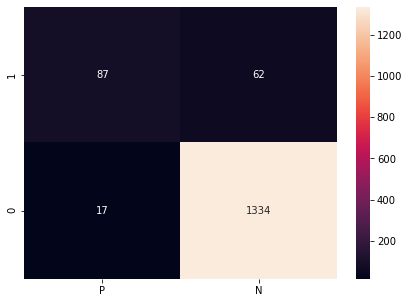

In [35]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_test,y_predict,labels=[1,0])
df_cm=pd.DataFrame(cm,index=[i for i in ['1','0']],columns=[i for i in ["P","N"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True,fmt='g')

In [36]:
print("Classification Report")
print(metrics.classification_report(y_test, y_predict, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.84      0.58      0.69       149
           0       0.96      0.99      0.97      1351

    accuracy                           0.95      1500
   macro avg       0.90      0.79      0.83      1500
weighted avg       0.94      0.95      0.94      1500



In [37]:
from sklearn.naive_bayes import GaussianNB
d_model=GaussianNB()
d_model.fit(X_train,y_train.ravel())

GaussianNB()

In [38]:
d_train_pred=d_model.predict(X_train)
from sklearn import metrics
print(metrics.accuracy_score(y_train,d_train_pred))

0.8905714285714286


In [39]:
d_model.fit(X_test,y_test.ravel())
d_test_pred=d_model.predict(X_test)
print(metrics.accuracy_score(y_test,d_test_pred))



0.8733333333333333


Confusion Matrix


<AxesSubplot:>

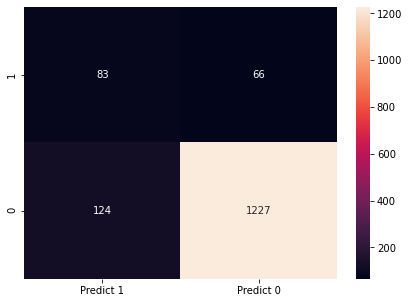

In [40]:
print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, d_test_pred, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt='g')

In [41]:
print("Classification Report")
print(metrics.classification_report(y_test, d_test_pred, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.40      0.56      0.47       149
           0       0.95      0.91      0.93      1351

    accuracy                           0.87      1500
   macro avg       0.67      0.73      0.70      1500
weighted avg       0.89      0.87      0.88      1500



In [42]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_df=scaler.fit_transform(X)
scaled_df=pd.DataFrame(scaled_df)

In [43]:
X_train,X_test,y_train,y_test=train_test_split(scaled_df,y,test_size=0.30,random_state=1)
from sklearn.neighbors import KNeighborsClassifier
NNH=KNeighborsClassifier(n_neighbors=5,weights="distance")
NNH.fit(X_train,y_train)

KNeighborsClassifier(weights='distance')

In [44]:
predictedlabels=NNH.predict(X_test)
print(NNH.score(X_test,y_test))


0.96


Confusion Matrix


<AxesSubplot:>

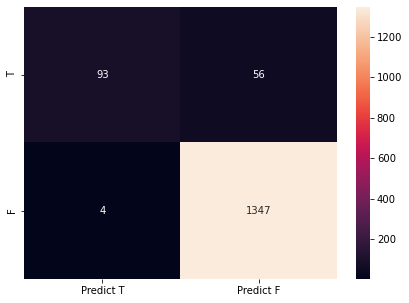

In [45]:
from sklearn import metrics

print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, predictedlabels, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["T","F"]],
                  columns = [i for i in ["Predict T","Predict F"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt='g')

In [46]:
print("Classification Report")
print(metrics.classification_report(y_test, predictedlabels, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.96      0.62      0.76       149
           0       0.96      1.00      0.98      1351

    accuracy                           0.96      1500
   macro avg       0.96      0.81      0.87      1500
weighted avg       0.96      0.96      0.96      1500



<AxesSubplot:>

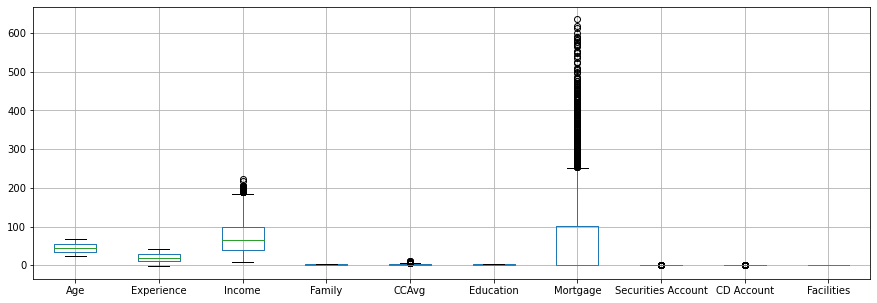

In [47]:
ax=plt.figure(figsize=(15,5))
X.boxplot()
    

In [48]:
X3=X.iloc[:,0:5]
Q1 = X3.quantile(0.25)
Q2=X3.quantile(0.50)
Q3 = X3.quantile(0.75)
IQR = Q3 - Q1
X_out = X3[~((X3 < (Q1 - 1.5 * IQR)) |(X3 > (Q3 + 1.5 * IQR))).any(axis=1)] # rows without outliers


In [49]:
X2 = X3.copy()

# Replace every outlier on the lower side by the lower whisker
for i, j in zip(np.where(X2 < Q1 - 1.5 * IQR)[0], np.where(X2 < Q1 - 1.5 * IQR)[1]): 
    
    whisker  = Q1 - 1.5 * IQR
    #print(whisker.shape)
    X2.iloc[i,j] = whisker[j]
    #print(whisker)
#Replace every outlier on the upper side by the upper whisker    
for i, j in zip(np.where(X2 > Q3 + 1.5 * IQR)[0], np.where(X2 > Q3 + 1.5 * IQR)[1]):
    
    whisker  = Q3 + 1.5 * IQR
    X2.iloc[i,j] = whisker[j]
x4=X.iloc[:,4:10]
x5=pd.concat([X2,x4],axis=1,sort=False)
x5


,Age,Experience,Income,Family,CCAvg,CCAvg,Education,Mortgage,Securities Account,CD Account,Facilities
0,25,1,49.0,4,1.6,1.6,1,0,1,0,0
1,45,19,34.0,3,1.5,1.5,1,0,1,0,0
2,39,15,11.0,1,1.0,1.0,1,0,0,0,0
3,35,9,100.0,1,2.7,2.7,2,0,0,0,0
4,35,8,45.0,4,1.0,1.0,2,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40.0,1,1.9,1.9,3,0,0,0,1
4996,30,4,15.0,4,0.4,0.4,1,85,0,0,1
4997,63,39,24.0,2,0.3,0.3,3,0,0,0,0
4998,65,40,49.0,3,0.5,0.5,2,0,0,0,1


<AxesSubplot:>

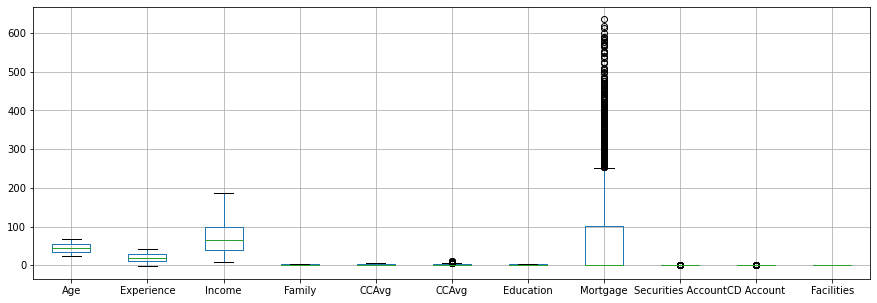

In [50]:
ax=plt.figure(figsize=(15,5))
x5.boxplot()

In [51]:
#model fitting after the outliers have been dealt with

In [52]:
from sklearn.preprocessing import StandardScaler
scaler2=StandardScaler()
scaled_df2=scaler2.fit_transform(x5)
scaled_df2=pd.DataFrame(scaled_df2)
X_train1,X_test1,y_train1,y_test1=train_test_split(scaled_df2,y,test_size=0.30,random_state=1)

In [53]:
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression(solver="liblinear")
model1.fit(X_train1,y_train1)
y_predict1=model1.predict(X_test1)
#coef_df1=pd.DataFrame(model1.coef_,columns=X_train1.columns+ "_coef")
#coef_df1['intercept']=model1.intercept

In [54]:
model1_score4=model1.score(X_test1,y_test1)
print(model1_score4)

0.95


<AxesSubplot:>

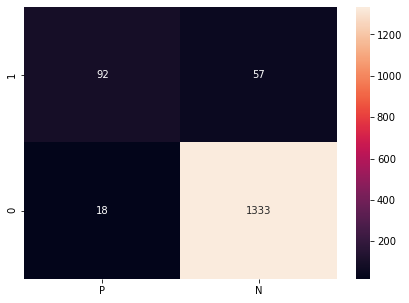

In [55]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_test1,y_predict1,labels=[1,0])
df_cm=pd.DataFrame(cm,index=[i for i in ['1','0']],columns=[i for i in ["P","N"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True,fmt='g')

In [56]:
print("Classification Report")
print(metrics.classification_report(y_test1, y_predict1, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.84      0.62      0.71       149
           0       0.96      0.99      0.97      1351

    accuracy                           0.95      1500
   macro avg       0.90      0.80      0.84      1500
weighted avg       0.95      0.95      0.95      1500



In [57]:
from sklearn.naive_bayes import GaussianNB
d_model1=GaussianNB()
d_model1.fit(X_train1,y_train1.ravel())
d_train_pred1=d_model1.predict(X_train1)
from sklearn import metrics
print(metrics.accuracy_score(y_train1,d_train_pred1))


0.8914285714285715


In [58]:
d_model1.fit(X_test1,y_test1.ravel())
d_test_pred1=d_model1.predict(X_test1)
print(metrics.accuracy_score(y_test1,d_test_pred1))

0.8653333333333333


<AxesSubplot:>

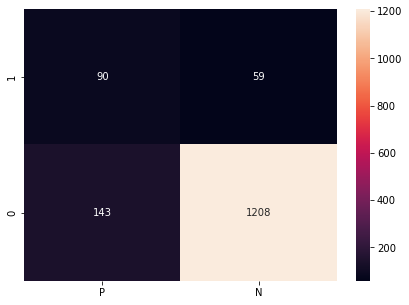

In [59]:
from sklearn import metrics
cm2=metrics.confusion_matrix(y_test1,d_test_pred1,labels=[1,0])
df_cm2=pd.DataFrame(cm2,index=[i for i in ['1','0']],columns=[i for i in ["P","N"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm2,annot=True,fmt='g')

In [60]:
print("Classification Report")
print(metrics.classification_report(y_test1, d_test_pred1, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.39      0.60      0.47       149
           0       0.95      0.89      0.92      1351

    accuracy                           0.87      1500
   macro avg       0.67      0.75      0.70      1500
weighted avg       0.90      0.87      0.88      1500



In [61]:
from sklearn.preprocessing import StandardScaler
scaler1=StandardScaler()
scaled_df1=scaler1.fit_transform(x5)
scaled_df1=pd.DataFrame(scaled_df1)

X_train2,X_test2,y_train2,y_test2=train_test_split(scaled_df1,y,test_size=0.30,random_state=1)



KNeighborsClassifier(weights='distance')

In [78]:
print(X_train2.shape)


(3500, 11)


In [62]:
predictedlabels1=NNH2.predict(X_test2)
print(NNH2.score(X_test2,y_test2))


0.954


Confusion Matrix


<AxesSubplot:>

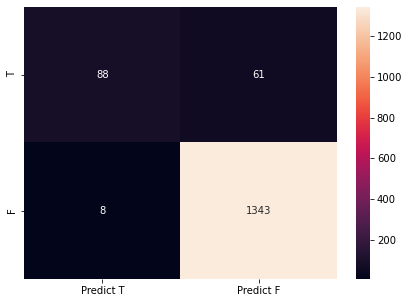

In [63]:

from sklearn import metrics

print("Confusion Matrix")
cm3=metrics.confusion_matrix(y_test2, predictedlabels1, labels=[1, 0])

df_cm3 = pd.DataFrame(cm3, index = [i for i in ["T","F"]],
                  columns = [i for i in ["Predict T","Predict F"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm3, annot=True,fmt='g')

In [64]:
print("Classification Report")
print(metrics.classification_report(y_test2,predictedlabels1, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.92      0.59      0.72       149
           0       0.96      0.99      0.97      1351

    accuracy                           0.95      1500
   macro avg       0.94      0.79      0.85      1500
weighted avg       0.95      0.95      0.95      1500



In [65]:
#knn is giving the best recall rate(0.62) and a precision of (.93)and accuracy of 95.4;hence thats the best model

In [66]:
#model fitting after introducing extra features

In [67]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train3 = poly.fit_transform(X_train)
X_test3 = poly.fit_transform(X_test)

poly_clf = linear_model.LogisticRegression()

poly_clf.fit(X_train3, y_train)

y_pred3 = poly_clf.predict(X_test3)
poly_clf_score=poly_clf.score(X_test3,y_test)
print(poly_clf_score)

0.976


C:\Users\hp pc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [68]:
print("Classification Report")
print(metrics.classification_report(y_test,y_pred3, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.94      0.81      0.87       149
           0       0.98      0.99      0.99      1351

    accuracy                           0.98      1500
   macro avg       0.96      0.90      0.93      1500
weighted avg       0.98      0.98      0.98      1500



In [69]:
from sklearn.naive_bayes import GaussianNB
d_model2=GaussianNB()
d_model2.fit(X_train3,y_train.ravel())
d_train_pred3=d_model2.predict(X_test3)
from sklearn import metrics
print(metrics.accuracy_score(y_test,d_train_pred3))

0.8746666666666667


In [70]:
print("Classification Report")
print(metrics.classification_report(y_test,d_train_pred3, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.40      0.53      0.46       149
           0       0.95      0.91      0.93      1351

    accuracy                           0.87      1500
   macro avg       0.67      0.72      0.69      1500
weighted avg       0.89      0.87      0.88      1500



In [82]:
from sklearn.preprocessing import StandardScaler
scaler2=StandardScaler()
scaled_df2=scaler2.fit_transform(X_train3)
scaled_df2=pd.DataFrame(scaled_df2)

In [113]:
X_train4,X_test4,y_train4,y_test4=train_test_split(scaled_df2,y_train,test_size=0.30,random_state=1)

NNH3=KNeighborsClassifier(n_neighbors=8,weights="distance")
NNH3.fit(X_train4,y_train4)


KNeighborsClassifier(n_neighbors=8, weights='distance')

In [114]:
print(X_train4.shape)


(2450, 56)


In [115]:
predictedlabels2=NNH3.predict(X_test4)
print(NNH3.score(X_test4,y_test4))

0.96


In [116]:
print("Classification Report")
print(metrics.classification_report(y_test4,predictedlabels2, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.97      0.59      0.73        97
           0       0.96      1.00      0.98       953

    accuracy                           0.96      1050
   macro avg       0.96      0.79      0.85      1050
weighted avg       0.96      0.96      0.96      1050



In [76]:
#by introducing polynomial features;we find the performance of logistic regression improves by a significant factor after introduction of polynomial features with precision=.94,recall=0.81 and accuracy=97.6